In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('weather_data.csv')

In [3]:
df

,Year,Day,Wind Speed,Specific Humidity,Relative Humidity,Precipitation,Temperature
0,1990,1,1.08,5.68,53.06,0.0,16.33
1,1990,2,1.13,5.92,58.06,0.0,15.68
2,1990,3,1.33,5.68,52.69,0.0,16.56
3,1990,4,1.09,5.19,47.19,0.0,17.09
4,1990,5,0.94,4.82,42.88,0.0,17.26
...,...,...,...,...,...,...,...
12108,2023,56,1.28,8.85,50.44,0.0,24.52
12109,2023,57,1.41,6.59,38.06,0.0,24.62
12110,2023,58,1.60,6.04,34.56,0.0,24.28
12111,2023,59,1.49,6.65,38.94,0.0,23.97


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12113 entries, 0 to 12112
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Year               12113 non-null  int64  
 1   Day                12113 non-null  int64  
 2   Wind Speed         12113 non-null  float64
 3   Specific Humidity  12113 non-null  float64
 4   Relative Humidity  12113 non-null  float64
 5   Precipitation      12113 non-null  float64
 6   Temperature        12113 non-null  float64
dtypes: float64(5), int64(2)
memory usage: 662.6 KB


In [5]:
df

,Year,Day,Wind Speed,Specific Humidity,Relative Humidity,Precipitation,Temperature
0,1990,1,1.08,5.68,53.06,0.0,16.33
1,1990,2,1.13,5.92,58.06,0.0,15.68
2,1990,3,1.33,5.68,52.69,0.0,16.56
3,1990,4,1.09,5.19,47.19,0.0,17.09
4,1990,5,0.94,4.82,42.88,0.0,17.26
...,...,...,...,...,...,...,...
12108,2023,56,1.28,8.85,50.44,0.0,24.52
12109,2023,57,1.41,6.59,38.06,0.0,24.62
12110,2023,58,1.60,6.04,34.56,0.0,24.28
12111,2023,59,1.49,6.65,38.94,0.0,23.97


In [6]:
skala = MinMaxScaler()
df_skala = skala.fit_transform(df)

In [7]:
panjang_sekuens = 10
sekuens = []
target = []

In [8]:
for i in range(len(df_skala) - panjang_sekuens):
    sekuens.append(df_skala[i:i+panjang_sekuens])
    target.append(df_skala[i+panjang_sekuens])

In [9]:
X = np.array(sekuens)
y = np.array(target)

In [10]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
print(f"Jumlah Data Training Set : {len(X_train)}")
print(f"Jumlah Data Validation Set : {len(X_val)}")

Jumlah Data Training Set : 9682
Jumlah Data Validation Set : 2421


In [12]:
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(panjang_sekuens, df.shape[1])))
model.add(Dense(df.shape[1]))
model.compile(optimizer=Adam(learning_rate=0.001), loss='mae', metrics="mae")

In [13]:
callbacks = [
    ModelCheckpoint('model-time-series-IDCAMP-2023.keras', save_best_only=True),
]

In [14]:
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_val, y_val), callbacks=callbacks)

Epoch 1/10
303/303 [==============================] - 4s 7ms/step - loss: 0.0937 - mae: 0.0937 - val_loss: 0.0398 - val_mae: 0.0398
Epoch 2/10
303/303 [==============================] - 2s 7ms/step - loss: 0.0355 - mae: 0.0355 - val_loss: 0.0359 - val_mae: 0.0359
Epoch 3/10
303/303 [==============================] - 2s 7ms/step - loss: 0.0337 - mae: 0.0337 - val_loss: 0.0340 - val_mae: 0.0340
Epoch 4/10
303/303 [==============================] - 3s 9ms/step - loss: 0.0319 - mae: 0.0319 - val_loss: 0.0324 - val_mae: 0.0324
Epoch 5/10
303/303 [==============================] - 2s 7ms/step - loss: 0.0308 - mae: 0.0308 - val_loss: 0.0306 - val_mae: 0.0306
Epoch 6/10
303/303 [==============================] - 2s 6ms/step - loss: 0.0300 - mae: 0.0300 - val_loss: 0.0322 - val_mae: 0.0322
Epoch 7/10
303/303 [==============================] - 2s 6ms/step - loss: 0.0293 - mae: 0.0293 - val_loss: 0.0287 - val_mae: 0.0287
Epoch 8/10
303/303 [==============================] - 2s 7ms/step - loss: 0.

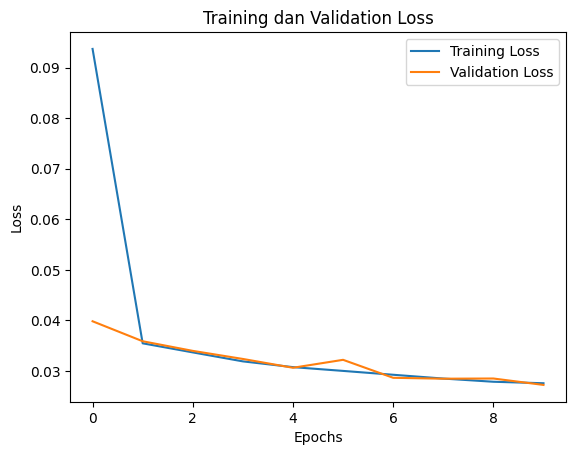

In [15]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training dan Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [16]:
mae_train = history.history['mae'][-1]
mae_val = history.history['val_mae'][-1]

In [17]:
mae_train_persen = mae_train * 100
mae_val_persen = mae_val * 100

In [18]:
print(f"MAE (Training): {mae_train_persen:.2f}%")


MAE (Training): 2.76%


In [19]:
print(f"MAE (Validation): {mae_val_persen:.2f}%")

MAE (Validation): 2.73%
